(60000, 784)
(10000, 784)
Epoch 1/30
235/235 [==============================] - 5s 19ms/step - loss: 0.2198 - val_loss: 0.1378
Epoch 2/30
235/235 [==============================] - 4s 18ms/step - loss: 0.1220 - val_loss: 0.1089
Epoch 3/30
235/235 [==============================] - 4s 19ms/step - loss: 0.1056 - val_loss: 0.0999
Epoch 4/30
235/235 [==============================] - 4s 15ms/step - loss: 0.0989 - val_loss: 0.0952
Epoch 5/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0946 - val_loss: 0.0917
Epoch 6/30
235/235 [==============================] - 3s 14ms/step - loss: 0.0914 - val_loss: 0.0891
Epoch 7/30
235/235 [==============================] - 3s 12ms/step - loss: 0.0889 - val_loss: 0.0866
Epoch 8/30
235/235 [==============================] - 3s 15ms/step - loss: 0.0866 - val_loss: 0.0848
Epoch 9/30
235/235 [==============================] - 3s 13ms/step - loss: 0.0851 - val_loss: 0.0836
Epoch 10/30
235/235 [==============================] - 3s 12ms/st

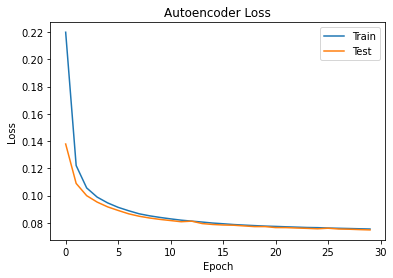

313/313 [==============================] - 1s 2ms/step


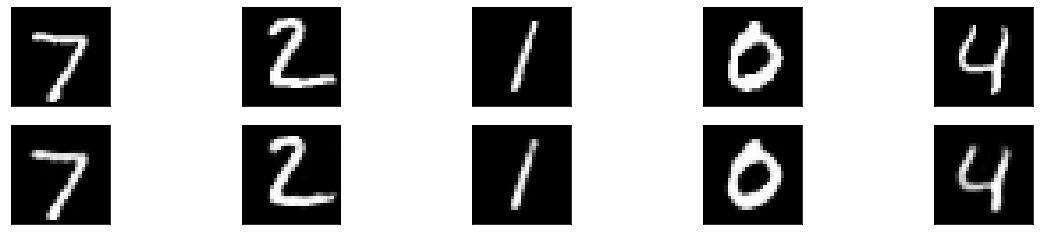

313/313 [==============================] - 0s 1ms/step
K-NN accuracy on encoded data: 96.49%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.97      0.96      0.96       892
           6       0.97      0.98      0.98       958
           7       0.96      0.95      0.96      1028
           8       0.98      0.94      0.95       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [1]:
# Import necessary libraries
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np, pandas as pd, matplotlib.pyplot as plt


# In[26]:


from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# In[27]:


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)


# In[28]:


# Define the Autoencoder
encoding_dim = 64
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)


# In[29]:


autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)


# In[30]:


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


# In[31]:


# Train the Autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


# In[32]:


# Plot accuracy and loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


# In[42]:


decoder=Model(encoded,decoded)


# In[43]:


encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# In[44]:


# Encode the data using trained Autoencoder
encoded_train = encoder.predict(x_train)
encoded_test = encoder.predict(x_test)


# In[45]:


# Apply K-NN on encoded data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(encoded_train, y_train)


# In[46]:


# Predict labels for test data
y_pred = knn.predict(encoded_test)


# In[47]:


# Evaluate the K-NN model
acc = accuracy_score(y_test, y_pred)
print(f"K-NN accuracy on encoded data: {acc * 100:.2f}%")


# In[48]:


from sklearn.metrics import classification_report
# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)